# Сборный проект №1

# Изучение закономерностей, определяющих успешность игр

Цель работы: Для интернет-магазина требуется произвести исследование популярности компьютерных игр для постороения грамотной рекламной компании потенциально прибыльных продуктов на следующий год. Необходимо выявить факторы и закономерности, определяющие популярность игры.

Из предоставленного файла мы получили несколько параметров разного рода. Первым этапом задачи будет анализ первичных данных, обнаружение ошибок. Вторым этапом работы будет подготовка данных, устранение пропусков, дубликатов и экстремальных значений. Третим этапом будет произведен исследовательский анализ данных .Четвертый этап - составление портрета пользователя каждого региона. Пятый этап - проверка гипотез. Завершим исследование общим выводом.

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
data = pd.read_csv(r'E:\Analytics\games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


По общей информации о датасете можно сообщить следующее:
1. Таблица имеет 16715 строк.
2. В некоторых столбцах есть пропуски.
3. Для некоторых столбцов следует откорректировать тип данных.

## Подготовим данные для анализа

### Заменим названия столбцов (приведем к нижнему регистру)

In [3]:
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Регистр наименований столбцов - изменен.

### Обработаем пропуски в данных

In [4]:
# Пропуски в процентах:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0
platform,0
year_of_release,2
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51
user_score,40


In [5]:
# Проверим пропуски в столбцах name и janre.
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки с пропусками с наименованием игры и жанром совпадают. Эти строки имеют мало полезной информации - удаляем.

In [6]:
data = data.drop(data[data['name'].isna()].index)

Проанализируем пропуски в столбце 'year_of_release': их всего 2% - можно удалить.

In [7]:
data = data.drop(data[data['year_of_release'].isna()].index)

Проверим таблицу на явные дубликаты:

In [8]:
data.duplicated().sum()

0

Касательно пропусков в столбцах 'critic_score', 'user_score','rating'  - заменять медианами, или пытаться 'угадать' значения в этих пропусках - не корректно. Удалять эти строки - значит потерять 40-50% данных. Самым разумным шагом будет присвоить значение, не мешающее дальнейшей работе с данными и в то же время сигнализирующее, что здесь нет данных: присвоим пропускам в этих данных значение '-1' и 'No data'. 

Касательно аббревиатуруы 'tbd' в столбце с оценкой пользователей - эта аббревиатура означает, что данные пока не внесены, можно считать пропуском. Обработаем эти пропуски:

In [9]:
#Уберем аббревеатуру и заменим на пропуски:
data.loc[data['user_score']=='tbd','user_score'] = float('nan')

In [10]:
#Теперь можно убрать пропуски во всех трех столбцах:
data['critic_score'] = data['critic_score'].fillna('-1').astype(float)
data['user_score'] = data['user_score'].fillna('-1').astype(float)
data['rating'] = data['rating'].fillna('No data').astype(object)

Проверим таблицу на пропуски:

In [11]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,0
user_score,0


Пропуски удалены, можно двигаться дальше.
Касательно возникновения этих пропусков: возможно эти данные не были загружены, или они исчезли после объединения таблиц или других операций с ними.

### Проанализируем типы данных в таблице

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Не откорректирован тип данных в столбце 'year_of_release':

In [13]:
# нас не интересует месяц и день, нужен только год, преобразуем его в численный формат
data['year_of_release'] = data['year_of_release'].astype('int')
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No data
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No data


Проверим еще раз тип данных:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int32
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [15]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No data,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No data,31.38


## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Оценим важность данных за все периоды.

In [16]:
games_pivot = data.pivot_table(index='year_of_release',values = 'name', aggfunc='count')
games_pivot.columns=['games_qty']
games_pivot.sort_values('games_qty', ascending=False).reset_index()

,year_of_release,games_qty
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


Для наглядности построим график:

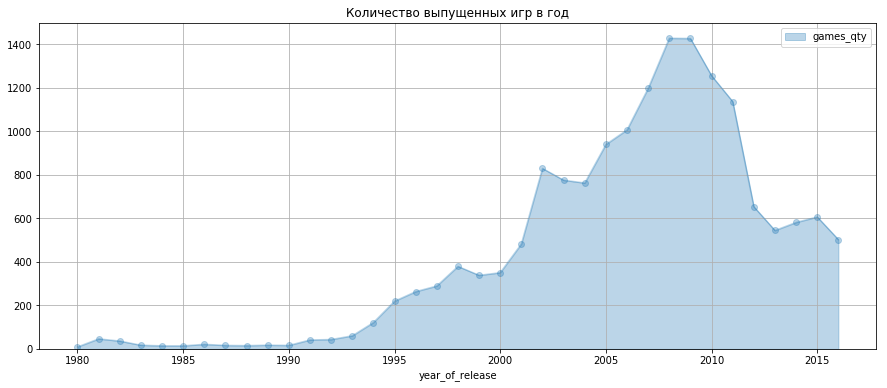

In [17]:
ax = games_pivot.plot(y='games_qty',kind='area', style='o-', alpha=.3, figsize=(15, 6), title='Количество выпущенных игр в год',grid=True)

Максимум по выпуску игр приходится на 2008 и 2009 годы - 1427 и 1426 игр соответственно. Очевидно, что до 1995 - выпускалось очень мало игр. Данные за период до 1995 не слишком важны для исследования.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Оценим за какой характерный срок появляются новые и исчезают старые платформы.

In [18]:
#Решено не учитывать данные до 1995 года, поэтому обновим таблицу:
data_new = data.query('(year_of_release>=1995)').reset_index()

#Посмотрим, какие платформы указаны в таблице:
display(data_new['platform'].unique())

array(['Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS',
       'N64', 'PS', 'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'SNES', 'DC',
       'PSV', 'SAT', 'WS', 'NG', 'TG16', '3DO', 'PCFX'], dtype=object)

In [19]:
# Сведем в таблицу данные по платформам
platform_pivot = data_new.pivot_table(index='platform', values = 'sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False)
platform_pivot.head(6) 

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55


Самыми прибыльными являются платформы: PS2,	X360, PS3, Wii, DS, PS.	

In [20]:
# Создадим таблицу с самыми прибыльными платформами:
top_platforms = platform_pivot.head(6)

In [21]:
#сгруппируем данные для выделенных топ-платформ:
top_platforms_list = top_platforms.index.tolist()
top_sales_platforms = data_new.query('platform in @top_platforms_list').pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
top_sales_platforms

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN
2003,NaN,2.07,184.31,NaN,NaN,NaN


В полученной таблице наглядно видно следующее:
- год выпуска первой и последней игры на некоторых платформ
- Пропуск NaN - означает отсутствие выпускаемых игр на данной плаформе - так можно проследить год запуска платформы.

Для каждой из данных платформ построим графики распределения продаж.

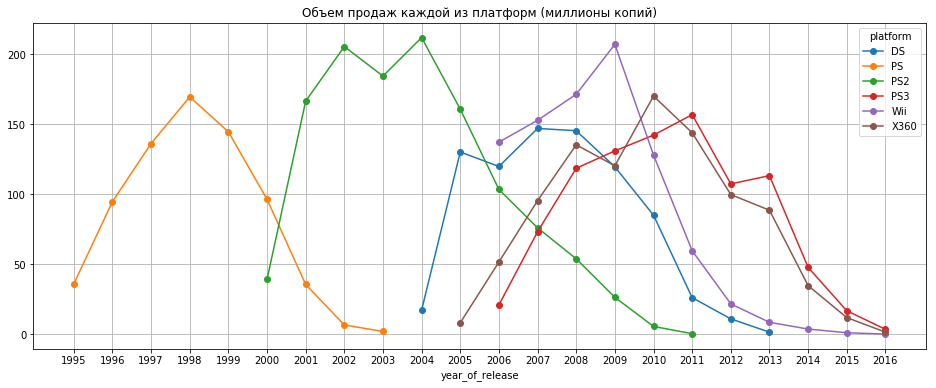

In [22]:
ax = top_sales_platforms.plot(style='o-', title='Объем продаж каждой из платформ (миллионы копий)',figsize=(16,6),grid=True)
ax.set_xticks(sorted(top_sales_platforms.index.tolist()))
#ax.set_xticklabels(labels);

В среднем можно сказать, что платформа "живет" около 10 лет. Пик продаж приходится на "середину" срока существоввания платформы, это 4-5 лет. 

In [23]:
# Посмотрим на выпуски игр самых популярных платформ: 
games = data_new.query('platform in @top_platforms_list').pivot_table(index = 'year_of_release', columns = 'platform', values = 'name', aggfunc = 'count')
games

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1995,NaN,99.0,NaN,NaN,NaN,NaN
1996,NaN,164.0,NaN,NaN,NaN,NaN
1997,NaN,188.0,NaN,NaN,NaN,NaN
1998,NaN,248.0,NaN,NaN,NaN,NaN
1999,NaN,200.0,NaN,NaN,NaN,NaN
2000,NaN,160.0,82.0,NaN,NaN,NaN
2001,NaN,91.0,185.0,NaN,NaN,NaN
2002,NaN,20.0,280.0,NaN,NaN,NaN
2003,NaN,3.0,256.0,NaN,NaN,NaN


В графическом формате данные по выпуску игр на популярных платформах:

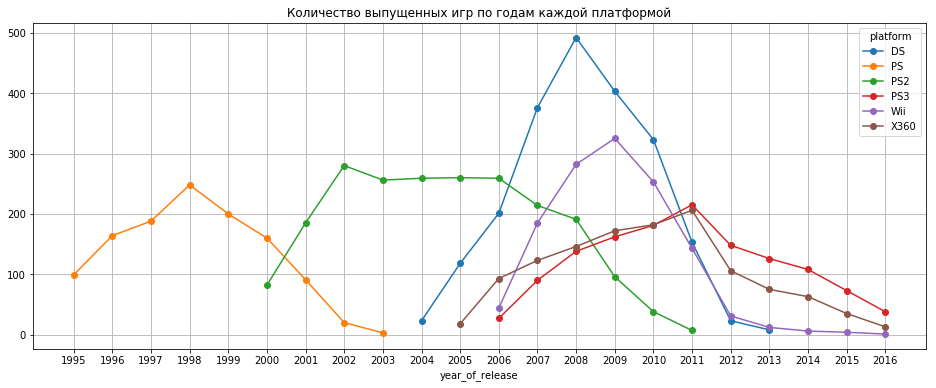

In [24]:
ax = games.plot(style='o-', title='Количество выпущенных игр по годам каждой платформой',figsize=(16,6),grid=True)
ax.set_xticks(sorted(games.index.tolist()))
ax.set_xticklabels(games.index);

Анализируя полученные графики можно сделать вывод о том, что у многих платформ пик продаж совпадает с пиком по количеству выпущенных игр. Эта информация пригодится для дальнейшего анализа.

Актуальным периодом для дальнешей работы назначим период с 2013 года: 
- эта дата не слишком далека от года, для которого производится анализ
- период с 2013 по 2017 год входит в обнаруженный дипазон "жизни" платформ, и на 2017 года может прийти пик продаж.

### Проанализируем данные за выбранный актуальный период

In [25]:
# одновим таблицу с учетом выбранного актуального периода
data_actual = data_new.query('(year_of_release>=2013)').reset_index().pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
data_actual

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


В графическом формате:

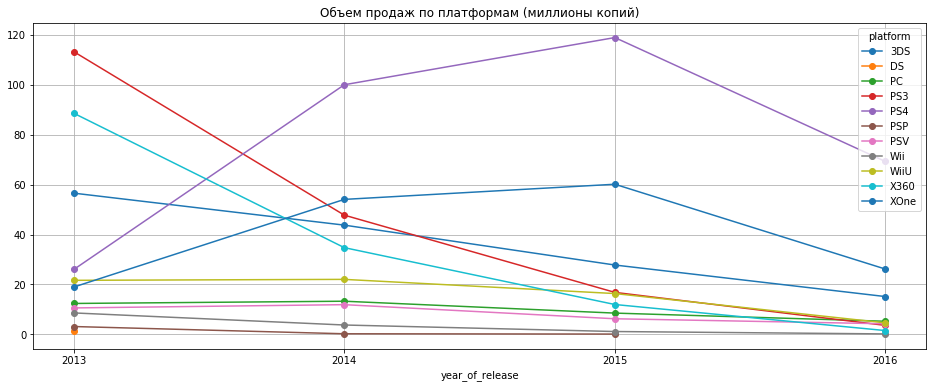

In [26]:
ax = data_actual.plot(style='o-', title='Объем продаж по платформам (миллионы копий)',figsize=(16,6),grid=True)
ax.set_xticks(sorted(data_actual.index.tolist()))
ax.set_xticklabels(data_actual.index.tolist());

Построенный график сообщает нам об общей тенденции к снижению объемов продаж компьютерных игр для исследуемых платформ. Посмотрим, что с объемом выпускаемых игр:

In [27]:
games_actual = data_new.query('(year_of_release>=2013)').reset_index().pivot_table(index = 'year_of_release', columns = 'platform', values = 'name', aggfunc = 'count')
games_actual

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,91.0,8.0,38.0,126.0,16.0,54.0,63.0,12.0,42.0,75.0,19.0
2014,80.0,NaN,47.0,108.0,75.0,10.0,100.0,6.0,31.0,63.0,61.0
2015,86.0,NaN,50.0,73.0,137.0,3.0,110.0,4.0,28.0,35.0,80.0
2016,46.0,NaN,54.0,38.0,164.0,NaN,85.0,1.0,14.0,13.0,87.0


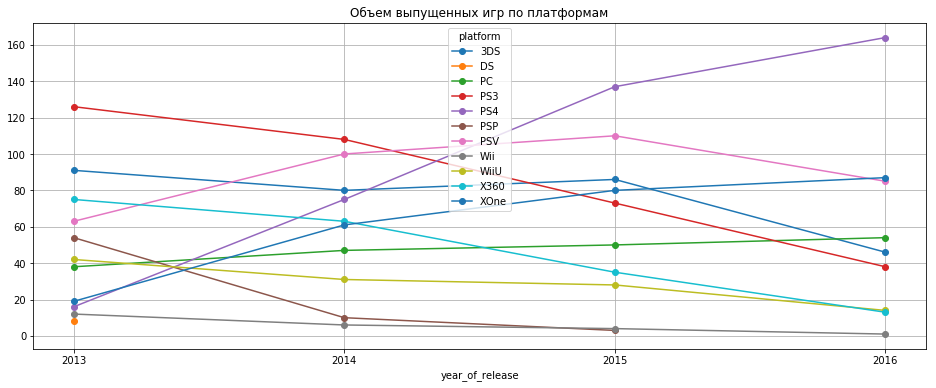

In [28]:
labels = games_actual.index.tolist()
ax = games_actual.plot(style='o-', title='Объем выпущенных игр по платформам',figsize=(16,6),grid=True,legend=True)
ax.set_xticks(sorted(games_actual.index.tolist()))
ax.set_xticklabels(labels);

Анализируя полученные графики получаем следующее:
    1. Как мы обнаружили ранее-наблюдается общая тенденция к снижению объемов продаж игр.
    2. При этом по объему выпускаемых игр некоторые платформы демонстрируют рост. Также, согласно условию задания, данные за 2016 год неполные, поэтому вполне возможно, что графики имели бы несколько другую конигурацию для 2016 года: данные по объему продаж и количеству выпущенных игр могут быть выше.

Принимая во внимание полученные ранее результаты исследования, можно предположить, что перспективными с точки зрения продаж могут быть платформы: PS4 и XOne.

Все остальные платформы демонстрируют падение продаж и объемов выпускаемых игр.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

[Text(0,0.5,'Общие продажи'),
 Text(0.5,0,'Платформа'),
 Text(0.5,1,'График "Ящик с усами"')]

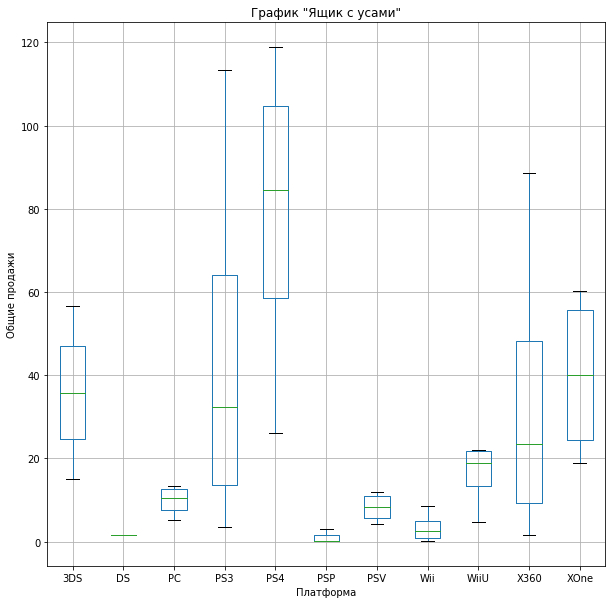

In [29]:
# все действия будем производить для платформ из актуального периода
data_actual.boxplot(figsize=(10,10), grid=True).set(title='График "Ящик с усами"',xlabel='Платформа', ylabel='Общие продажи')

Явным лидером по продажам за актуальный период является платформа PS4 - эту платформу можно рассматривать в качестве возможного лидера в 2017 году. Почетное второе место по продажам занимает PS3 и замыкает тройку лидеров - XOne. На эти платформы стоит обратить внимание.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Для работы отфильтруем исходную таблицу по актуальному периоду:

In [30]:
data_for_corr = data.query('(year_of_release>=2013)').reset_index()
data_for_corr.head(5)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No data,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No data,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Построим диаграммы рассеяния для каждой платформы из "тройки лидеров".

Платформа PS4:

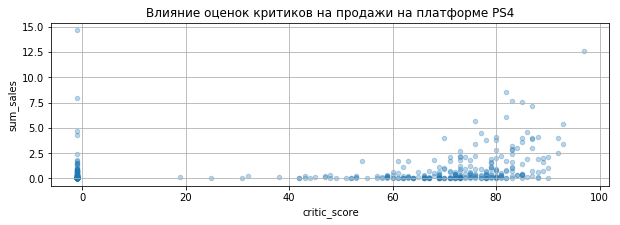

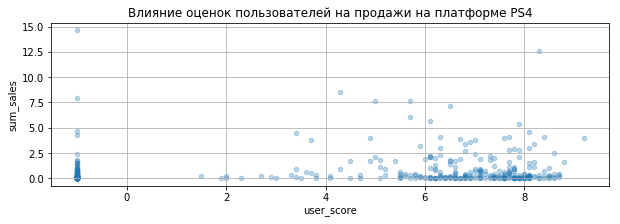

In [31]:
data_PS4 = data_for_corr.query('platform =="PS4"').reset_index()
data_PS4.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, alpha=0.3, figsize=(10,3), title = 'Влияние оценок критиков на продажи на платформе PS4')
data_PS4.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, alpha=0.3, figsize=(10,3), title = 'Влияние оценок пользователей на продажи на платформе PS4')

Платформа PS3:

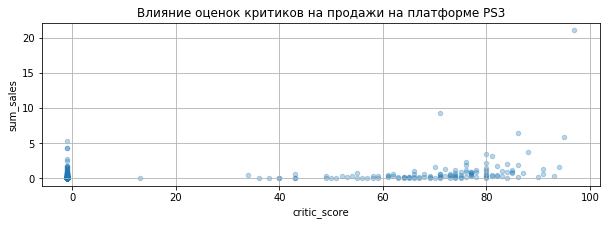

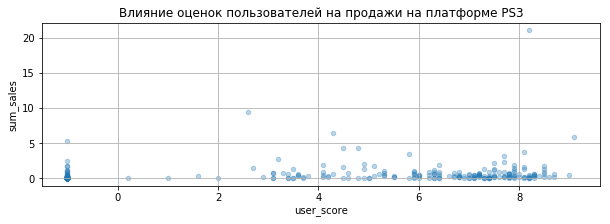

In [32]:
data_PS3 = data_for_corr.query('platform =="PS3"').reset_index()
data_PS3.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, alpha=0.3, figsize=(10,3), title = 'Влияние оценок критиков на продажи на платформе PS3')
data_PS3.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, alpha=0.3, figsize=(10,3), title = 'Влияние оценок пользователей на продажи на платформе PS3')

Платформа XOne:

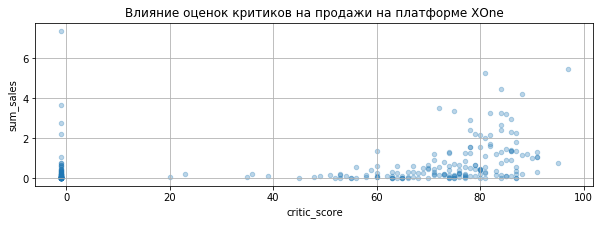

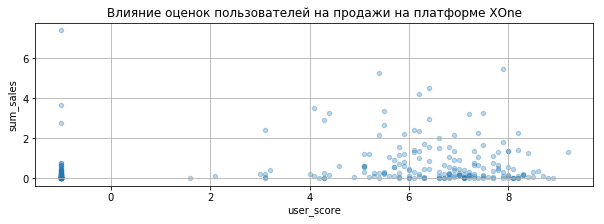

In [33]:
data_XOne = data_for_corr.query('platform =="XOne"').reset_index()
data_XOne.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, alpha=0.3, figsize=(10,3), title = 'Влияние оценок критиков на продажи на платформе XOne')
data_XOne.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, alpha=0.3, figsize=(10,3), title = 'Влияние оценок пользователей на продажи на платформе XOne')

Посчитаем корреляцию для выбранных трех платформ:

Платформа PS4:

In [34]:
display('Коэфициент корреляции оценок критиков:',data_PS4['critic_score'].corr(data_XOne['sum_sales']))
display('Коэфициент корреляции оценок пользователей:', data_PS4['user_score'].corr(data_XOne['sum_sales']))

'Коэфициент корреляции оценок критиков:'

0.18732471561193803

'Коэфициент корреляции оценок пользователей:'

0.06991745645863197

Платформа PS3:

In [35]:
display('Коэфициент корреляции оценок критиков:', data_PS3['critic_score'].corr(data_XOne['sum_sales']))
display('Коэфициент корреляции оценок пользователей:',data_PS3['user_score'].corr(data_XOne['sum_sales']))

'Коэфициент корреляции оценок критиков:'

0.29211582963456856

'Коэфициент корреляции оценок пользователей:'

0.1992135073968817

Платформа XOne:

In [36]:
display('Коэфициент корреляции оценок критиков:',data_XOne['critic_score'].corr(data_XOne['sum_sales']))
display('Коэфициент корреляции оценок пользователей:', data_XOne['user_score'].corr(data_XOne['sum_sales']))

'Коэфициент корреляции оценок критиков:'

0.27378217261702115

'Коэфициент корреляции оценок пользователей:'

0.12171152458232884

Можно сказать, что между оценкой критиков и объемами продаж есть небольшая положительная корреляция. Касательно корреляции объемов продаж и оценки пользователе - она незначительно положительная, или почти отсутствует.

### Посмотрим на общее распределение игр по жанрам.

In [37]:
genre = data_for_corr.pivot_table(index='genre',values = ['sum_sales','na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum').sort_values('sum_sales',ascending=False).reset_index()
genre

,genre,eu_sales,jp_sales,na_sales,other_sales,sum_sales
0,Action,118.13,40.49,126.05,37.20,321.87
1,Shooter,87.86,6.61,109.74,28.77,232.98
2,Sports,60.52,5.41,65.27,19.45,150.65
3,Role-Playing,36.97,51.04,46.40,11.48,145.89
4,Misc,20.04,9.20,27.49,6.09,62.82
5,Platform,15.58,4.79,18.14,4.12,42.63
6,Racing,20.19,2.30,12.96,4.44,39.89
7,Fighting,8.55,7.65,15.55,3.56,35.31
8,Adventure,8.25,5.82,7.14,2.43,23.64
9,Simulation,10.92,4.52,4.86,1.46,21.76


Для наглядности, построим столбчатую диаграмму:

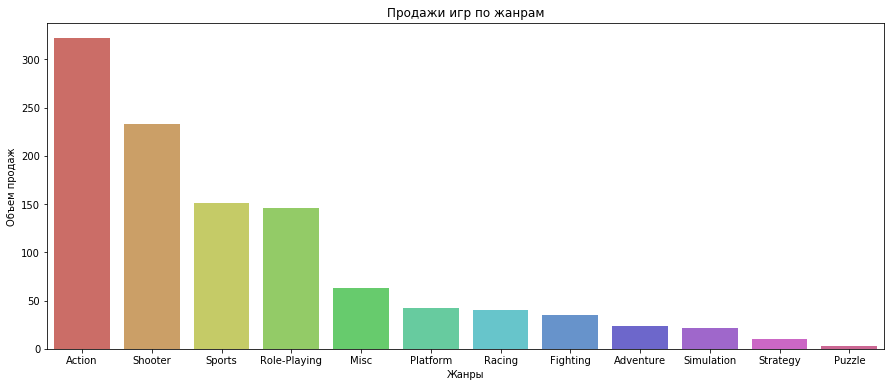

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(data=genre,x='genre',y='sum_sales', palette='hls')
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Объем продаж')
plt.show()


Самый популярный жанр - Action. Далее следуют - Shooter и Sports. Наименее популярными жанрами являются Strategy и Puzzle. Объем продаж третьего по популярности жанра чуть более, чем в два раза меньше самого популярного жанра Action.

 
Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи

In [39]:
genre_corr = data_for_corr.pivot_table(index='genre',values = ['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='median').reset_index()
genre_corr

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,0.020,0.01,0.020,0.010
1,Adventure,0.000,0.01,0.000,0.000
2,Fighting,0.020,0.03,0.045,0.010
3,Misc,0.010,0.02,0.010,0.000
4,Platform,0.080,0.00,0.090,0.025
5,Puzzle,0.000,0.02,0.000,0.000
6,Racing,0.060,0.00,0.030,0.010
7,Role-Playing,0.010,0.05,0.020,0.010
8,Shooter,0.190,0.00,0.200,0.050
9,Simulation,0.035,0.00,0.000,0.005


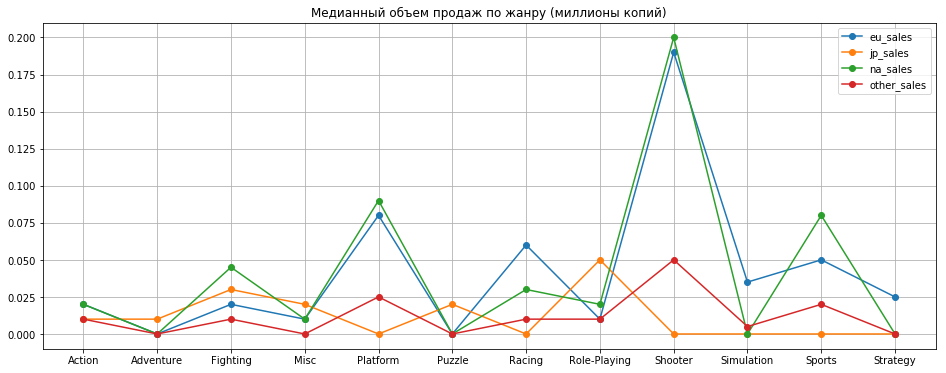

In [40]:
labels = genre_corr['genre']
ax = genre_corr.plot(style='o-', title='Медианный объем продаж по жанру (миллионы копий)',figsize=(16,6),grid=True)
ax.set_xticks(sorted(genre_corr.index.tolist()))
ax.set_xticklabels(labels);

Лидер по жанру в Европе и СА сменился - это Shooter. А по сумме продаж- был Action. В Японии лидер - по-прежднему Role-playing.

## Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Изучим различия в долях продаж.

In [41]:
top_5_platforms = data_for_corr.pivot_table(index='platform',values = ['na_sales','eu_sales','jp_sales','sum_sales'], aggfunc='sum').sort_values('sum_sales',ascending=False).reset_index()
top_5_platforms

,platform,eu_sales,jp_sales,na_sales,sum_sales
0,PS4,141.09,15.96,108.74,314.14
1,PS3,67.81,23.35,63.50,181.43
2,XOne,51.59,0.34,93.12,159.32
3,3DS,30.96,67.81,38.20,143.25
4,X360,42.52,0.51,81.66,136.80
5,WiiU,19.85,10.88,29.21,64.63
6,PC,25.36,0.00,11.11,39.43
7,PSV,6.10,18.59,5.04,32.99
8,Wii,5.93,0.05,6.56,13.66
9,PSP,0.17,3.29,0.00,3.50


Не слишком наглядно.Построим для каждого региона диаграмму по продажам.

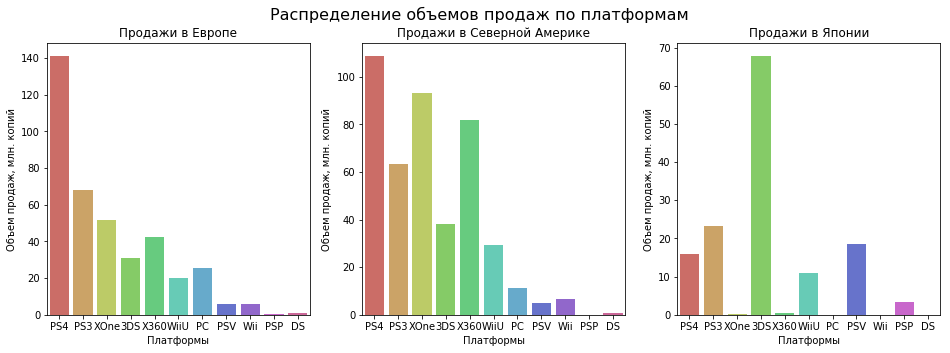

In [42]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

ax_1=sns.barplot(ax=ax[0],data=top_5_platforms,x='platform',y='eu_sales', palette='hls')
ax_2=sns.barplot(ax=ax[1],data=top_5_platforms,x='platform',y='na_sales', palette='hls')
ax_3=sns.barplot(ax=ax[2],data=top_5_platforms,x='platform',y='jp_sales', palette='hls')
 
fig.suptitle('Распределение объемов продаж по платформам', fontsize= 16)            

ax[0].set(xlabel='Платформы', ylabel='Объем продаж, млн. копий',title='Продажи в Европе')
ax[1].set(xlabel='Платформы', ylabel='Объем продаж, млн. копий', title='Продажи в Северной Америке')
ax[2].set(xlabel='Платформы', ylabel='Объем продаж, млн. копий', title='Продажи в Японии')
plt.show()

Построим круговую диаграмму для наглядности распределения продаж по платформам в процентах.

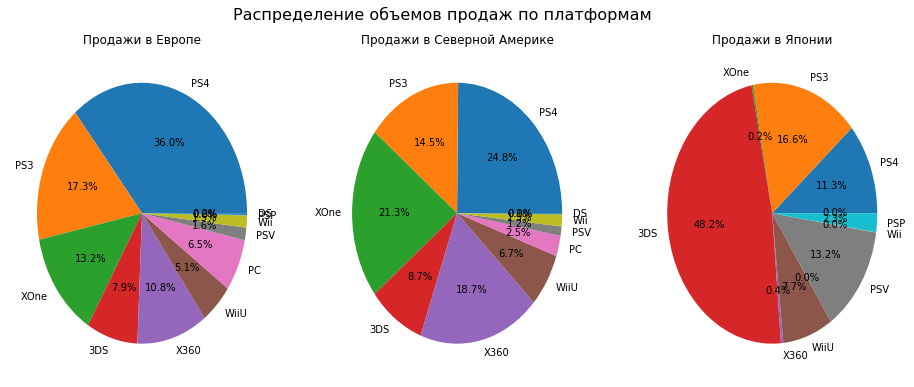

In [43]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
labels = top_5_platforms['platform'].tolist()
#explode = (0.1, 0, 0, 0, 0, 0,0, 0, 0, 0, 0) # выделим самую продаваему в мире платформу

top_5_platforms.plot.pie(ax=ax[0], y='eu_sales', autopct='%1.1f%%', labels=labels)#, explode=explode)
top_5_platforms.plot.pie(ax=ax[1], y='na_sales', autopct='%1.1f%%', labels=labels)#, explode=explode)
top_5_platforms.plot.pie(ax=ax[2], y='jp_sales', autopct='%1.1f%%', labels=labels)#, explode=explode)

 
fig.suptitle('Распределение объемов продаж по платформам', fontsize= 16)            

ax[0].set(xlabel='', ylabel='',title='Продажи в Европе')
ax[1].set(xlabel='', ylabel='', title='Продажи в Северной Америке')
ax[2].set(xlabel='', ylabel='', title='Продажи в Японии')
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()

plt.show()

По графикам видим, что популярные платформы различаются в зависимости от регионов. При этом платформа DS во всех трех регионах является весьма непопулярной.
- Топ-5 платформ для Европы: PS4, PS3, XOne, X360, 3DS.
- Топ-5 платформ для Северной Америки: PS4, XOne, X360, PS3, 3DS.
- Топ-5 платформ для Японии: 3DS, PS3, PSV, PS4, WiiU.

Таким образом, пятерка самых популярных платформ для Европы и Северной Америки совпадают, но в разных долях. В Японии же лидирует платформа, наимеенее популярная из пятерки платформ для европы и Северной Америки.



Дополнительно построим график продаж по платформам:

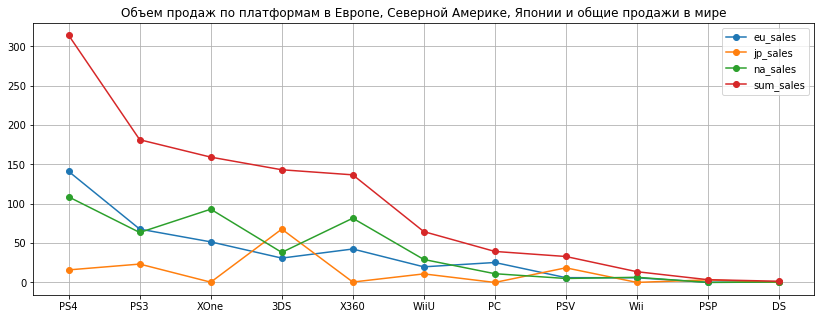

In [44]:
labels = top_5_platforms['platform'].tolist()
ax = top_5_platforms.plot(style='o-', title='Объем продаж по платформам в Европе, Северной Америке, Японии и общие продажи в мире',figsize=(14,5),grid=True, legend=True)
ax.set_xticks(sorted(top_5_platforms.index.tolist()))
ax.set_xticklabels(labels);

График более наглядно демонстрирует различия в долях продаж: XOne более популярен в Северной Америке, чем в Европе, тоже самое и для платформы X360. При этом, общий лидер из платформ - PS4 в Европе популярнее. В Японии- самая популярная платформа - 3DS.

### Определим самые популярные жанры в регионах (топ-5).

In [45]:
top_5_genre = data_for_corr.pivot_table(index=['genre'],values = ['eu_sales','na_sales','jp_sales'], aggfunc='sum').reset_index()
top_5_genre

,genre,eu_sales,jp_sales,na_sales
0,Action,118.13,40.49,126.05
1,Adventure,8.25,5.82,7.14
2,Fighting,8.55,7.65,15.55
3,Misc,20.04,9.20,27.49
4,Platform,15.58,4.79,18.14
5,Puzzle,1.00,1.18,0.83
6,Racing,20.19,2.30,12.96
7,Role-Playing,36.97,51.04,46.40
8,Shooter,87.86,6.61,109.74
9,Simulation,10.92,4.52,4.86


Для наглядности построим график:

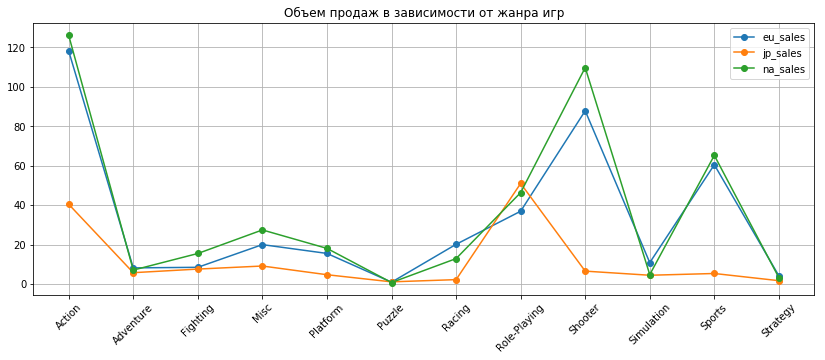

In [46]:
labels = top_5_genre['genre'].tolist()
ax = top_5_genre.plot(style='o-', title='Объем продаж в зависимости от жанра игр',figsize=(14,5),grid=True, legend=True)
ax.set_xticks(sorted(top_5_genre.index.tolist()))
ax.set_xticklabels(labels,rotation=45);

Как можно увидеть, линии графиков для Европы и для Северной Америки повторяют друг друга с небольшим расхождением. Показатели для Японии сильно отличаются, здесь больше всего любят Role-Playing и гораздно меньше интересуются Shooter...Менталитет оказывает существенное влияние на многое, в том числе на выбор жанров компьютерных игр.

Для альтернативного отображения инфомации построим круговую диаграмму в процентах:

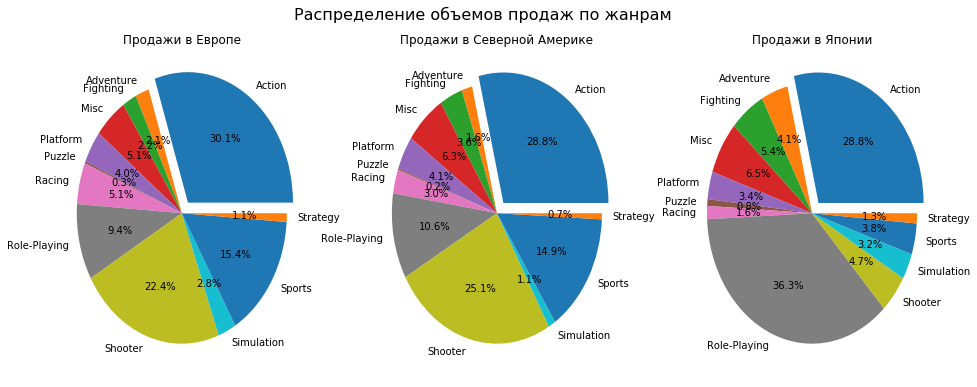

In [47]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
labels = top_5_genre['genre'].tolist()
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) # выделим самую продаваемый жанр

top_5_genre.plot.pie(ax=ax[0], y='eu_sales', autopct='%1.1f%%', labels=labels, explode=explode)
top_5_genre.plot.pie(ax=ax[1], y='na_sales', autopct='%1.1f%%', labels=labels, explode=explode)
top_5_genre.plot.pie(ax=ax[2], y='jp_sales', autopct='%1.1f%%', labels=labels, explode=explode)

 
fig.suptitle('Распределение объемов продаж по жанрам', fontsize= 16)            

ax[0].set(xlabel='', ylabel='',title='Продажи в Европе')
ax[1].set(xlabel='', ylabel='', title='Продажи в Северной Америке')
ax[2].set(xlabel='', ylabel='', title='Продажи в Японии')
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()

plt.show()

Круговая диаграмма демонстриует, что объем продаж игр жанра Action примерно одинаков во всех трех регионах.

Как и ранее при выборе платформы Европа и Северная Америка демонстируют единодушие в выборе жанров игр с различием в долях продаж. Япония снова проявляет оригинальность, при этом 4 жанра из популярнейших на западе входят в пятерку самых популярных жанров Японии. 

### Оценим влияние рейтинга ESRB на продажи в отдельном регионе.

In [48]:
rating = data_for_corr.pivot_table(index=['rating'],values = ['eu_sales','na_sales','jp_sales'], aggfunc='sum').reset_index()
rating 

,rating,eu_sales,jp_sales,na_sales
0,E,83.36,15.14,79.05
1,E10+,42.69,5.89,54.24
2,M,145.32,14.11,165.21
3,No data,78.91,85.05,89.42
4,T,41.95,20.59,49.79


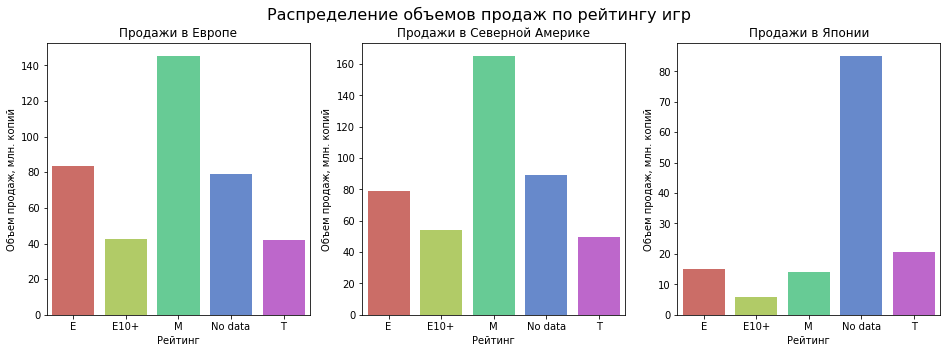

In [49]:
# Построим столбчатые диаграммы продаж для наглядности

fig, ax = plt.subplots(1,3, figsize=(16,5))

ax_1=sns.barplot(ax=ax[0],data=rating,x='rating',y='eu_sales', palette='hls')
ax_2=sns.barplot(ax=ax[1],data=rating,x='rating',y='na_sales', palette='hls')
ax_3=sns.barplot(ax=ax[2],data=rating,x='rating',y='jp_sales', palette='hls')
 
fig.suptitle('Распределение объемов продаж по рейтингу игр', fontsize= 16)            

ax[0].set(xlabel='Рейтинг', ylabel='Объем продаж, млн. копий',title='Продажи в Европе')
ax[1].set(xlabel='Рейтинг', ylabel='Объем продаж, млн. копий', title='Продажи в Северной Америке')
ax[2].set(xlabel='Рейтинг', ylabel='Объем продаж, млн. копий', title='Продажи в Японии')
plt.show()

Круговая диаграмма продаж по платформам выглядит так:

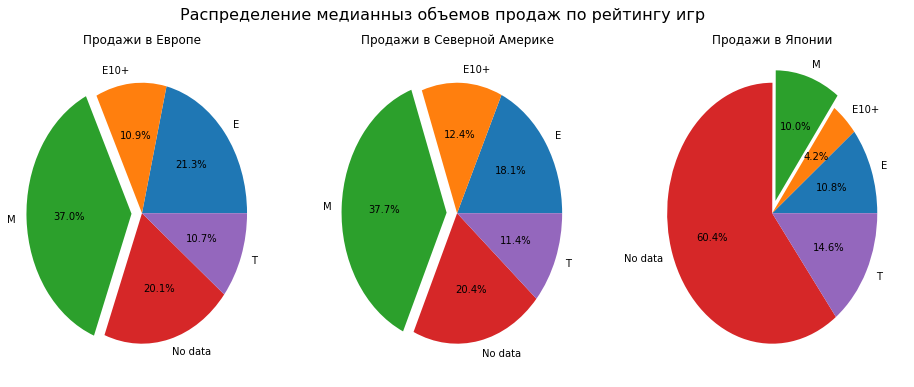

In [50]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
labels = rating['rating'].tolist()
explode = (0, 0, 0.1, 0, 0) # выделим рейтинг с самымии высокими продажами

rating.plot.pie(ax=ax[0], y='eu_sales', autopct='%1.1f%%', labels=labels, explode=explode)
rating.plot.pie(ax=ax[1], y='na_sales', autopct='%1.1f%%', labels=labels, explode=explode)
rating.plot.pie(ax=ax[2], y='jp_sales', autopct='%1.1f%%', labels=labels, explode=explode)

 
fig.suptitle('Распределение медианныз объемов продаж по рейтингу игр', fontsize= 16)            

ax[0].set(xlabel='', ylabel='',title='Продажи в Европе')
ax[1].set(xlabel='', ylabel='', title='Продажи в Северной Америке')
ax[2].set(xlabel='', ylabel='', title='Продажи в Японии')
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()

plt.show()

Еще одно представление результата - Построим на одном графике:

[Text(0,0,'E'),
 Text(0,0,'E10+'),
 Text(0,0,'M'),
 Text(0,0,'No data'),
 Text(0,0,'T')]

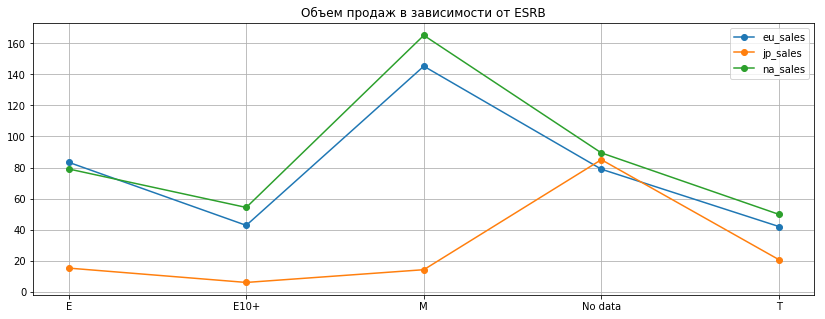

In [51]:
labels = rating['rating'].tolist()
ax = rating.plot(style='o-', title='Объем продаж в зависимости от ESRB',figsize=(14,5),grid=True, legend=True)
ax.set_xticks(sorted(rating.index.tolist()))
ax.set_xticklabels(labels)

## Проверка гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

In [52]:
# необходимые библиотеки для расчета статистических данных
from scipy import stats as st
import numpy as np

Нулевая гепотеза состоит в следующем: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, так как нулевая гепотеза всегда формулируется с использованием знака равенства.

Альтернативная гепотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Зададим пороговое значение alpha = 0.05 (на усмотрение аналитика)

In [53]:
# Создадим нужные выборки
XOne_user_rating = data_for_corr[data_for_corr['platform'] =='XOne']['user_score']
pc_user_rating = data_for_corr[data_for_corr['platform'] =='PC']['user_score']

In [54]:
alpha=0.05

results = st.ttest_ind(XOne_user_rating, pc_user_rating,equal_var=False)

# вывод значения p-value на экран 

display ('Значение p-value:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'Значение p-value:'

0.19564149183065668

'Не получилось отвергнуть нулевую гипотезу'

Гепотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - верна.

### Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гепотеза состоит в следующем: Средние пользовательские рейтинги жанров Action и Sports одинаковые, так как нулевая гепотеза всегда формулируется со знаком равенства.

Альтернативная гепотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

Зададим пороговое значение alpha = 0.05

In [55]:
# Создадим нужные выборки
action_user_rating = data_for_corr[data_for_corr['genre'] =='Action']['user_score']
sports_user_rating = data_for_corr[data_for_corr['genre'] =='Sports']['user_score']

In [56]:
alpha=0.05

results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var=False)

# вывод значения p-value на экран 

display ('Значение p-value:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'Значение p-value:'

0.008445505365573194

'Отвергаем нулевую гипотезу'

Нулевая гепотеза о равенстве пользовательских рейтингов жанров Action и Sports неверна. Пользовательские рейтинги действительно различаются.

In [57]:
display(data_for_corr.shape[0])

2233

Для выбора статистического критерия необходимо знать характеристики выборок: нам необходимо сравнить средние двух независимых выборок с колличественными переменными. Средние этих выборок имеют нормальное распределение. Выборки достаточно велики. Таким образом можно воспользоваться t-критерием Стьюдента - Статистический тест с использованием t-распределения.

## Общий вывод по исследованию

Перед нами стояла задача найти и проанализировать взаимосвязи между различными параметрами в метрике по продажам различных компьютерных игр. В ходе решения данной задачи были проведеные следующие действия:

1. Исходный файл был подвергнут тщательному анализу на предмет ошибок, пропусков, дубликатов: ошибки устранены, пропуски либо удалены, либо заполнены максимально вероятными значениями.
2. Данные проанализированы на актуальность и очищены от искажений.
3. Выявлены периоды существования платформ и ориентировочные пики продаж за период существования.
4. Сформированы новые столбцы с данными для углубленного и всестороннего анализа взаимосвязей параметров.
5. Составлен портрет пользователя каждого региона.
6. Произведен анализ исходных параметров, а также влияние на объем продаж таких параметров, как платформа игры, жанр игр, рейтинг, оценки пользователей и критиков, а также влияние региона. Все данные  и полученные результаты выведены в табличной и графической форме для удобства.
7. Проверены гипотезы о пользовательских рейтингах платформ и жанров. 

Как и предполагалось, на популярность игры влияют множество факторов:

1. Популярные игры, жанры и платформы сильно разнятся в зависимости от региона: На Западе предпочетают игры в жанре Shooter, Platform, Sports и Racing, в то время как на Востоке играют в Role-playing и Fighting, Sports - вообще не интересен. Касательно игровых платформ - на Западе популярны PS4 и XOne. На Востоке - 3DS и PS3.

Таким образом, при планировании рекламной компании для продаж компьютерных игр необходимо учитывать целевой регион.

2. На объем продаж игр влияет рейтинг ESRB: Самые продаваемые игры имеют рейтинг М - для лиц старше 17 лет. Также очень популярны продукты с рейтингом Е- для всех. Ввиду неполноты данных и пропусков в рейтингах - большая доля продаж выпала на игры с неустановленным рейтингом.

3. Также имеет значение оценка критиков.  Мнение пользователей, увы, никакого влияния на объем продаж не имеет.

Таким образом, для рекламной компании на будущий 2017 год следует обратить внимание на игры жанра Shooter и Platform платформ PS4 и XOne (если продажи ориентированы на общемировую и Западную аудиторию), если продажи ориентированы на "рисовые" страны - следует обратить внимание на игры жанра Role-playing и Fighting платформ 3DS и PS3. 


Задача решена, поставленные цели достигнуты.